# Ride Sharing Data Analysis

1. By analyzing data from each city, we found the total number of riders and average fare are closely related to city types. Therefore, we may do market differentiation based on city types. Specifically, most urban cities have the highest total number of rides, while rural cities have the lowest number, suggesting there are higher needs in urban cities than rural. On the other hand, rural cities show the highest average fare, and urban cities show lowest, which may reflect the traveling distance of the rides. 


2. Further analyzing data by city types, we found that most majority of total fares (63%) and total rides (68%) come from urban city, followed by suburban city, and the rural city show the lowest. These data suggest the urban cities are our major market, and suburban cities are our 2nd market.


3. Similarly, there are highest percentage (81%) of drivers in urban city type, and the lowest in rural city type (3%). Interestingly, we also observe that 3% drivers from rural responsible for the 7% total fares from rural cities. This might suggest a need for drivers in rural cities.


In [26]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, on="city", how="left")

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

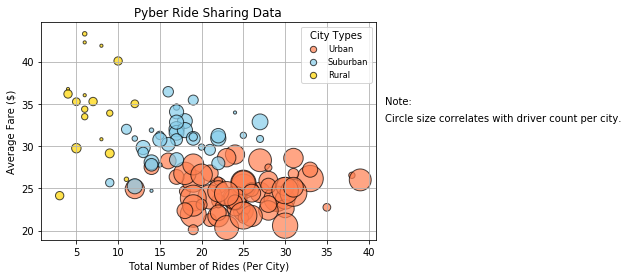

In [27]:
### Obtain the x and y coordinates for each of the three city types

#group the data by "type","city"
city_groups = combined_df.groupby(["type","city"])
#calculate the y value
avg_fare_city = city_groups["fare"].mean()
#calculate the x value
total_ride_city = city_groups["ride_id"].count()
#calculate the size value (drive count)
driver_count_city = city_groups["driver_count"].mean()
#make a new dataframe to hold the values
sum_df = pd.DataFrame({"Total Number of Rides":total_ride_city,
                       "Average Fare":avg_fare_city, "Driver Count":driver_count_city})


## Build the scatter plots for each city types

#collect the data of urban city type
urban_df = sum_df.loc["Urban"]
urban_scatter = plt.scatter(urban_df["Total Number of Rides"],urban_df["Average Fare"],
                            s=urban_df["Driver Count"]*10,marker ="o",edgecolors="black",
                            color="coral",label="Urban",alpha=0.7, linewidths=1)

#collect the data of suburban city type
suburban_df = sum_df.loc["Suburban"]
suburban_scatter = plt.scatter(suburban_df["Total Number of Rides"],suburban_df["Average Fare"],
                               s=suburban_df["Driver Count"]*10,marker ="o", edgecolors="black",
                               color="skyblue",label="Suburban",alpha=0.7, linewidths=1)

#collect the data of suburban city type
rural_df = sum_df.loc["Rural"]
rural_scatter = plt.scatter(rural_df["Total Number of Rides"],rural_df["Average Fare"],
                            s=rural_df["Driver Count"]*10,marker ="o", edgecolors="black",
                            color="gold",label="Rural",alpha=0.7, linewidths=1)


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

#Add a title to the legend, and change the size of the legend label to be the same
lgnd = plt.legend(loc="best",title="City Types",fontsize='small')
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]

# Incorporate a text label regarding circle size
plt.annotate('Note:', xy=(40, 35), xytext=(42,35))
plt.annotate('Circle size correlates with driver count per city.', xy=(40, 35), xytext=(42,33))

# Save Figure
plt.savefig("Images/bubbleplot.png",bbox_inches="tight")
plt.show()

## Total Fares by City Type

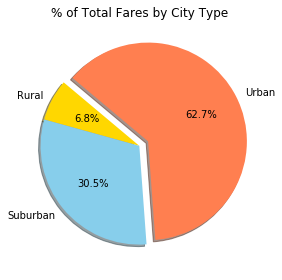

In [28]:
# Calculate Type Percents

#group by city type
type_groups = combined_df.groupby("type")
#get the total fare for the size parameter
total_fare_type = type_groups["fare"].sum()
#place the city types into a list
type_list = total_fare_type.keys()
#????set oval ??set the size

explode= [0,0,0.1]
colors= ("gold","skyblue","coral")


# Build Pie Chart, use set_ylabel to remove the "fare" label
fare_pie = total_fare_type.plot(kind="pie", labels=type_list, explode=explode,autopct="%1.1f%%",shadow=True,
                                startangle=140, colors=colors, title=("% of Total Fares by City Type"))
fare_pie.set_ylabel("")

# Save Figure
plt.tight_layout()
plt.savefig("Images/farespie.png")

# Show Figure
plt.show()

## Total Rides by City Type

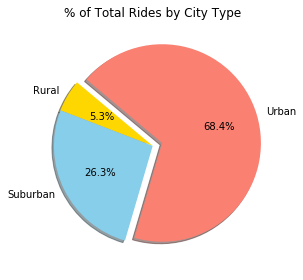

In [15]:
# Calculate Ride Percents
total_rides_type = type_groups["ride_id"].count()


# Build Pie Chart
rides_pie = total_rides_type.plot(kind="pie", labels=type_list, explode=explode,autopct="%1.1f%%",shadow=True,
                                  startangle=140,colors=colors,title=("% of Total Rides by City Type"))
rides_pie.set_ylabel("")

# Save Figure
plt.tight_layout()
plt.savefig("Images/ridespie.png")

# Show Figure
plt.show()

## Total Drivers by City Type

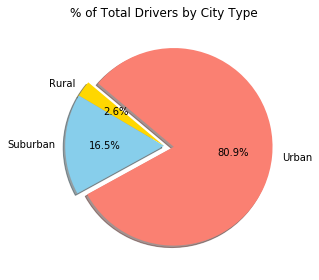

In [16]:
# Calculate Driver Percents (use the sum_df made in the bubble plot section, group it by city type, and do the sum)
total_drives_type = sum_df.groupby("type")["Driver Count"].sum()


# Build Pie Charts
drivers_pie = total_drives_type.plot(kind="pie", labels=type_list, explode=explode,autopct="%1.1f%%",
                                     shadow=True,startangle=140,colors=colors,
                                     title=("% of Total Drivers by City Type"))
drivers_pie.set_ylabel("")


# Save Figure
plt.tight_layout()
plt.savefig("Images/driverspie.png")

# Show Figure
plt.show()